#### Contents

#### Visualizations to show the distribution of cutomer profiles

#### Aggregations of Customer Profiles

#### Visualizations to address instacart stakeholder questions

# Part 1 (6-9)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Making Path do data as a string
path = r'C:\Users\bbissonette\Documents\Data Analytics Course\Acheivement 4\Instacart Basket Analysis'

In [3]:
# Importing Orders Products Merged Data Frame
final_df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'high_activity_orders_products_customers_profiled.pkl'))

# Step 6, 7, and 8 in each profile

### Create an appropriate visualization to show the distribution of profiles.

In [4]:
# Reviewing Column Headers
final_df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_y', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', ' price_range_loc',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependents', 'marital_status',
       'income', 'region', 'activity_flag', 'age_group', 'income_group',
       'department', 'dependents_group', 'family_profile'],
      dtype='object')

Family Profiles

Text(0, 0.5, 'Number of Orders in 10 Millions')

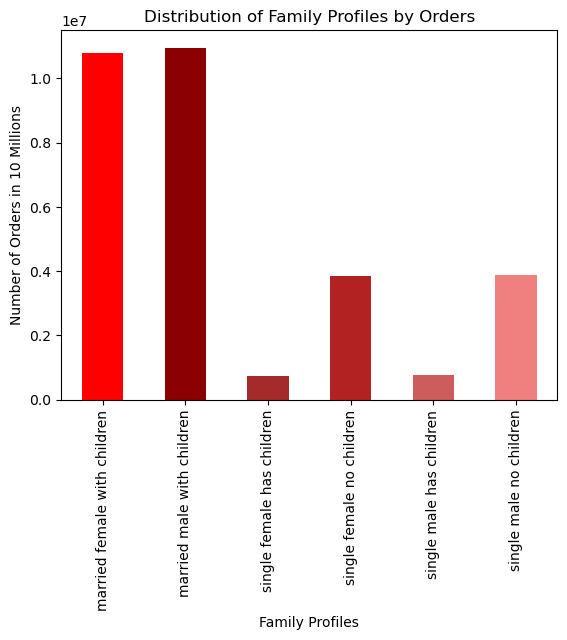

In [5]:
# Creating Family Profile Distribution by orders
family_profile_dist = final_df['family_profile'].value_counts().sort_index().plot.bar(color = ['red','darkred', 'brown', 'firebrick', 'indianred', 'lightcoral'])
plt.title("Distribution of Family Profiles by Orders")
plt.xlabel("Family Profiles")
plt.ylabel("Number of Orders in 10 Millions")

In [6]:
# Exporting Graph
family_profile_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_family_profile_distribution.png'))

In [7]:
# Aggregating Family Profile Data
family_aggregated = final_df.groupby('family_profile').agg({
    'order_id': 'count',
    'prices': ['min', 'mean', 'max']})
family_aggregated

order_id prices                    
                                 count    min       mean      max
family_profile                                                   
married female with children  10805188    1.0  11.875642  99999.0
married male with children    10957082    1.0  12.014382  99999.0
single female has children      724251    1.0  12.215390  99999.0
single female no children      3861943    1.0  11.666213  99999.0
single male has children        758324    1.0   9.629006  99999.0
single male no children        3884754    1.0  12.538619  99999.0

In [8]:
# Creating Crosstab for family_profile and region to visualize
family_by_region = pd.crosstab(final_df['family_profile'],final_df['region'], dropna = False)
family_by_region

region,Midwest,Northeast,South,West
family_profile,,,,
married female with children,2562046,1858843,3572032,2812267
married male with children,2529318,1998491,3657900,2771373
single female has children,171997,118858,254320,179076
single female no children,906380,664283,1315498,975782
single male has children,179683,137922,251569,189150
single male no children,918033,691477,1268751,1006493


Text(0.5, 0, 'Family Profile')

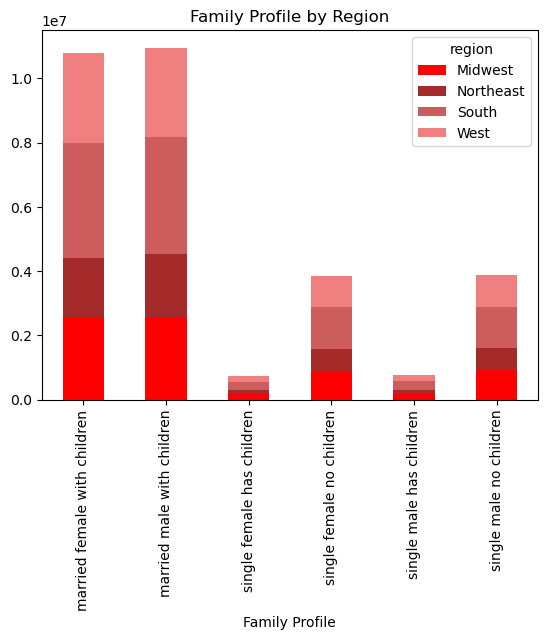

In [9]:
# Visualizing Crosstab
family_by_region_bar = family_by_region.plot.bar(color = ['red', 'brown', 'indianred', 'lightcoral'], stacked = True)
plt.title("Family Profile by Region")
plt.xlabel("Family Profile")

In [10]:
# Exporting Graph
family_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_by_region_barchart.png'))

In [11]:
# Creating Crosstab for family_profile and department to visualize
family_by_department = pd.crosstab(final_df['department'],final_df['family_profile'], dropna = False)
family_by_department

family_profile,married female with children,married male with children,single female has children,single female no children,single male has children,single male no children
department,,,,,,
alcohol,52459,46962,3784,18601,4595,18226
babies,140919,146764,9253,50469,10128,52859
bakery,395010,393620,26507,139885,27403,142601
beverages,899686,907791,58292,322425,60816,322924
breakfast,237417,238160,16465,83733,16994,84304
bulk,11884,11934,777,4081,856,3919
canned goods,351369,361208,22967,124165,25510,126855
dairy eggs,1808605,1833980,123320,649869,127708,648346
deli,349284,353049,23776,126183,24343,127199


Text(0.5, 0, 'Family Profile')

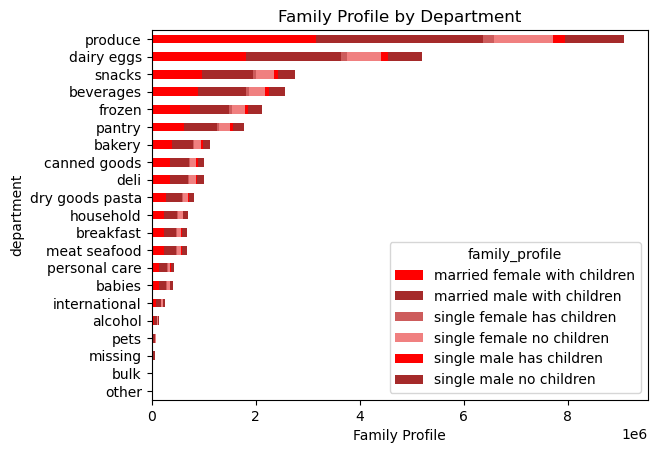

In [12]:
# Visualizing Cross Tab
family_by_department_bar = family_by_department.sort_values(by=['married female with children'], ascending = True).plot.barh(color = ['red', 'brown', 'indianred', 'lightcoral'], stacked= True)
plt.title("Family Profile by Department")
plt.xlabel("Family Profile")

In [13]:
# Exporting Graph
family_by_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_by_departmentgoods_barchart.png'))

Income Profiles

Text(0, 0.5, 'Number of Orders In 10 Millions')

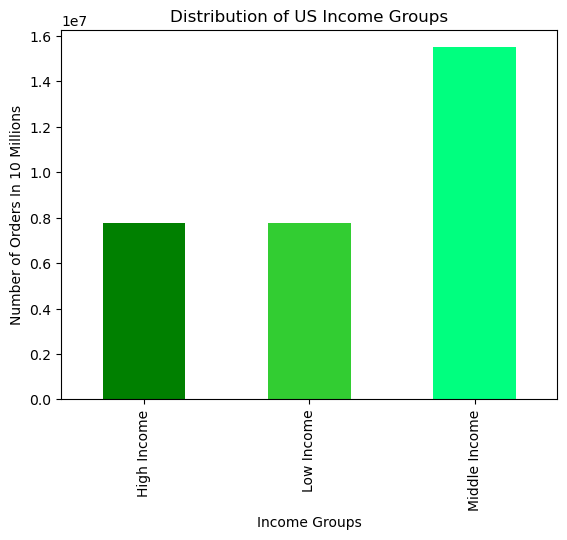

In [14]:
# Creating Income Group Distribution
income_group_dist = final_df['income_group'].value_counts().sort_index().plot.bar(color = ['green','limegreen', 'springgreen'])
plt.title("Distribution of US Income Groups")
plt.xlabel("Income Groups")
plt.ylabel("Number of Orders In 10 Millions")

In [15]:
# Exporting Graph
income_group_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_dist_barchart.png'))

In [16]:
# Aggregating Income Group Data
income_aggregated = final_df.groupby('income_group').agg({
    'order_id': 'count',
    'prices': ['min', 'mean', 'max']})
income_aggregated

order_id prices                    
                  count    min       mean      max
income_group                                      
High Income     7748002    1.0  21.972865  99999.0
Low Income      7747971    1.0   7.315104  14900.0
Middle Income  15495569    1.0   9.225264  99999.0

In [17]:
# Creating Crosstab for income_group and region to visualize
income_by_region = pd.crosstab(final_df['income_group'],final_df['region'], dropna = False)
income_by_region

region,Midwest,Northeast,South,West
income_group,,,,
High Income,1843614,1374220,2551285,1978883
Low Income,1792233,1368158,2595749,1991831
Middle Income,3631610,2727496,5173036,3963427


Text(0.5, 0, 'Income Groups')

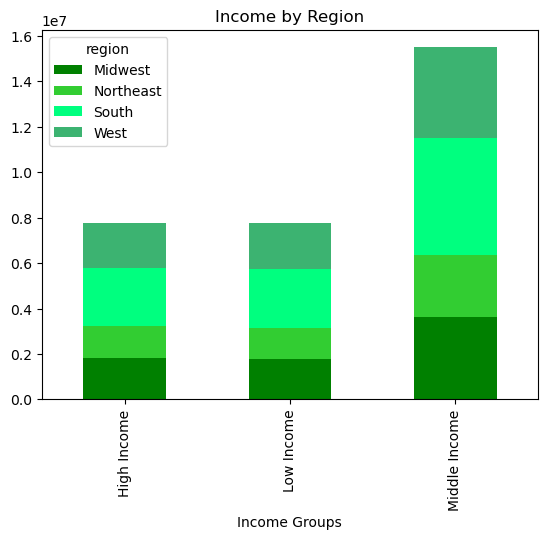

In [18]:
# Visualizing Crosstab
income_by_region_bar = income_by_region.plot.bar(color = ['green','limegreen', 'springgreen','mediumseagreen' ], stacked = True)
plt.title("Income by Region")
plt.xlabel("Income Groups")

In [19]:
# Exporting Graph
income_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_by_region_barchart.png'))

In [20]:
# Creating Crosstab for department and income_group to visualize
income_by_department = pd.crosstab(final_df['department'],final_df['income_group'], dropna = False)
income_by_department

income_group,High Income,Low Income,Middle Income
department,,,
alcohol,40862,36825,66940
babies,105674,83826,220892
bakery,291202,266809,567015
beverages,618574,743163,1210197
breakfast,164387,189185,323501
bulk,7541,9400,16510
canned goods,265877,222461,523736
dairy eggs,1317763,1232205,2641860
deli,251021,248139,504674


Text(0.5, 0, 'Income Profile')

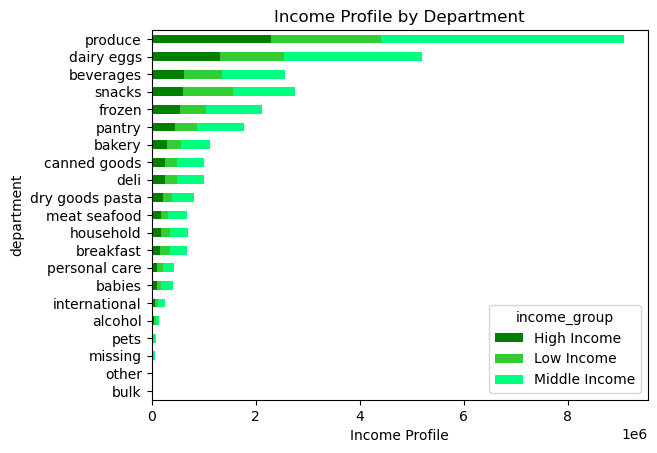

In [21]:
# Visualizing Crosstab
income_by_department_bar = income_by_department.sort_values(by=['High Income'], ascending = True).plot.barh(color = ['green','limegreen', 'springgreen','mediumseagreen'], stacked= True)
plt.title("Income Profile by Department")
plt.xlabel("Income Profile")

In [22]:
# Exporting Graph
income_by_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_by_department_barchart.png'))

Age Group Profile

Text(0, 0.5, 'Number of Orders In 10 Millions')

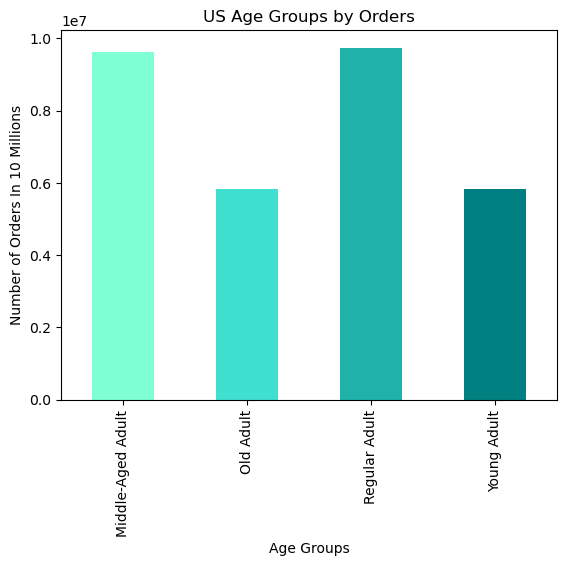

In [23]:
# Creating age_group distribution of data
age_group_dist = final_df['age_group'].value_counts().sort_index().plot.bar(color = ['aquamarine','turquoise', 'lightseagreen', 'teal'])
plt.title("US Age Groups by Orders")
plt.xlabel("Age Groups")
plt.ylabel("Number of Orders In 10 Millions")

In [24]:
# Exporting Graph
age_group_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_dist_barchart.png'))

In [25]:
# Aggregating age_group data
age_aggregated = final_df.groupby('age_group').agg({
    'order_id': 'count',
    'prices': ['min', 'mean', 'max']})
age_aggregated

order_id prices                    
                     count    min       mean      max
age_group                                            
Middle-Aged Adult  9612305    1.0  11.660323  99999.0
Old Adult          5817576    1.0  11.880596  99999.0
Regular Adult      9738888    1.0  12.079352  99999.0
Young Adult        5822773    1.0  12.199585  99999.0

In [26]:
# Creating Crosstab for family_profile and region to visualize
age_by_region = pd.crosstab(final_df['region'],final_df['age_group'], dropna = False)
age_by_region

age_group,Middle-Aged Adult,Old Adult,Regular Adult,Young Adult
region,,,,
Midwest,2258649,1347782,2304146,1356880
Northeast,1694727,1041349,1708693,1025105
South,3174123,1932288,3251175,1962484
West,2484806,1496157,2474874,1478304


Text(0.5, 0, 'Regions')

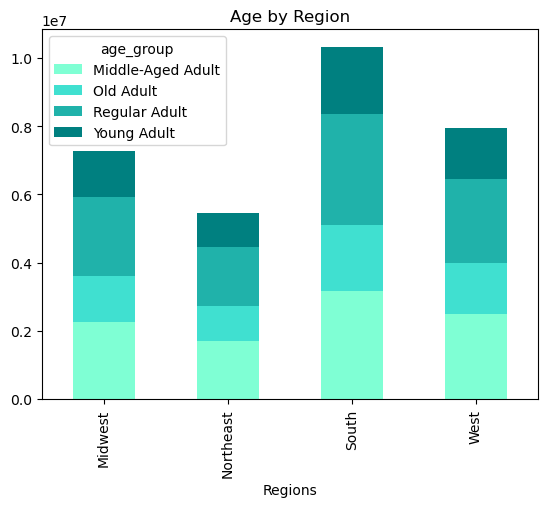

In [27]:
# Visualizing Crosstab
age_by_region_bar = age_by_region.plot.bar(color = ['aquamarine','turquoise', 'lightseagreen', 'teal'], stacked = True)
plt.title("Age by Region")
plt.xlabel("Regions")

In [28]:
# Exporting Graph
age_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_by_region_barchart.png'))

In [29]:
# Creating Crosstab for family_profile and region to visualize
age_by_department = pd.crosstab(final_df['department'],final_df['age_group'], dropna = False)
age_by_department

age_group,Middle-Aged Adult,Old Adult,Regular Adult,Young Adult
department,,,,
alcohol,44443,26091,46155,27938
babies,126178,75686,130770,77758
bakery,349276,211000,353552,211198
beverages,801690,489388,803198,477658
breakfast,208389,127356,211964,129364
bulk,10199,6244,10594,6414
canned goods,315399,188148,316357,192170
dairy eggs,1595629,975774,1641477,978948
deli,311658,187932,315711,188533


Text(0.5, 0, 'Age Profile')

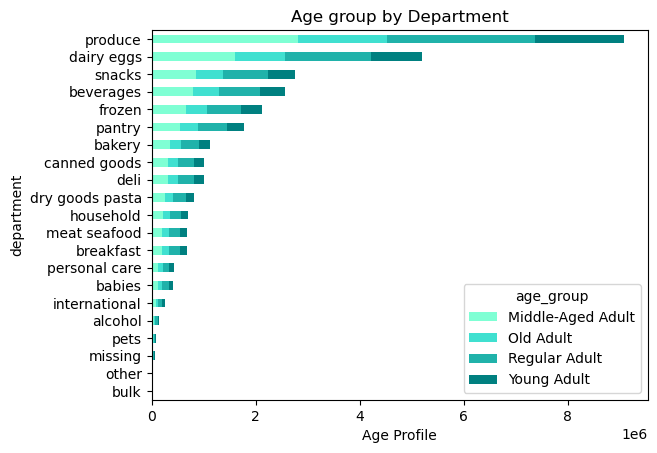

In [30]:
# Visualizing Crosstab
age_by_department_bar = age_by_department.sort_values(by=['Middle-Aged Adult'], ascending = True).plot.barh(color = ['aquamarine','turquoise', 'lightseagreen', 'teal'], stacked= True)
plt.title("Age group by Department")
plt.xlabel("Age Profile")

In [31]:
# Exporting Graph
age_by_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_by_department_barchart.png'))

Department Goods Profile

Text(0, 0.5, 'Number of Orders In 10 Millions')

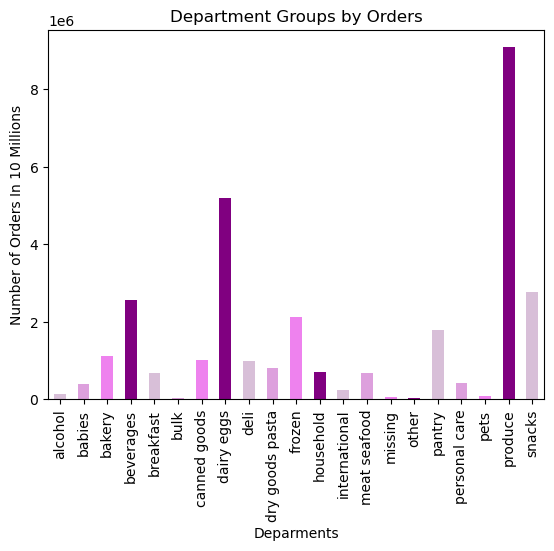

In [32]:
# Creating a department goods distribution
department_id_goods_dist = final_df['department'].value_counts().sort_index().plot.bar(color = ['thistle','plum', 'violet', 'purple'])
plt.title("Department Groups by Orders")
plt.xlabel("Deparments")
plt.ylabel("Number of Orders In 10 Millions")

In [33]:
# Exporting Graph
department_id_goods_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_id_goods_dist_barchart.png'))

In [34]:
# Aggregating deparment goods data
department_aggregated = final_df.groupby('department').agg({
    'order_id': 'count',
    'prices': ['min', 'mean', 'max']})
department_aggregated

order_id prices                    
                   count    min       mean      max
department                                         
alcohol           144627    1.0   8.150699     15.0
babies            410392    1.0   7.634399     15.0
bakery           1125026    1.0   7.868462     15.0
beverages        2571934    1.0   7.682624     15.0
breakfast         677073    1.0   8.069958     14.9
bulk               33451    1.4   8.346919     14.1
canned goods     1012074    1.0   7.546660     15.0
dairy eggs       5191828    1.0  33.061592  99999.0
deli             1003834    1.0   7.783347     15.0
dry goods pasta   822136    1.0   7.349370     15.0
frozen           2123342    1.0   7.738627     15.0
household         699858    1.0   7.379943     15.0
international     255991    1.0   7.678797     15.0
meat seafood      674785    8.0  16.300062     25.0
missing            64768    1.0   8.660655     15.0
other              34411    1.1   6.961995     15.0
pantry           1782903    1.0   8.014940     20.0
personal care     424362    1.0   7.998872     15.0
pets               93065    1.0   7.887860     15.0
produce          9079276    1.0   7.980349     15.0
snacks           2766406    1.6   4.275555      7.0

In [35]:
# Creating Crosstab for department and region to visualize
region_by_department = pd.crosstab(final_df['department'],final_df['region'], dropna = False)
region_by_department

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,262614,200136,373055,289221
beverages,598990,462931,859435,650578
breakfast,157553,119157,225177,175186
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1215821,917293,1727823,1330891
deli,234464,178398,333620,257352


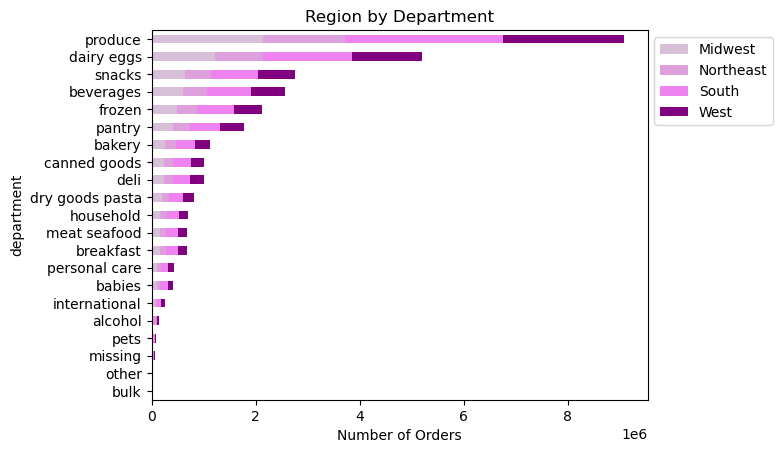

In [36]:
# Visualizing Crosstab
region_by_department = region_by_department.sort_values(by=['Midwest'], ascending = True).plot.barh(color = ['thistle','plum', 'violet', 'purple'], stacked= True)
plt.title("Region by Department")
plt.xlabel("Number of Orders")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [37]:
# Exporting Graph
region_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_by_department_barchart.png'))

In [38]:
# Reviewing final_df output
final_df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,...,number_of_dependents,marital_status,income,region,activity_flag,age_group,income_group,department,dependents_group,family_profile
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,3,married,40423,South,high-activity customer,Regular Adult,Low Income,beverages,Has Dependents,married female with children
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,3,married,40423,South,high-activity customer,Regular Adult,Low Income,beverages,Has Dependents,married female with children
2,473747,1,prior,3,3,12,21.0,196,1,1,...,3,married,40423,South,high-activity customer,Regular Adult,Low Income,beverages,Has Dependents,married female with children
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,3,married,40423,South,high-activity customer,Regular Adult,Low Income,beverages,Has Dependents,married female with children
4,431534,1,prior,5,4,15,28.0,196,1,1,...,3,married,40423,South,high-activity customer,Regular Adult,Low Income,beverages,Has Dependents,married female with children


# Step 9

## Produce suitable charts to illustrate your results and export them in your project folder

The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

In [39]:
# Reviewing the value counts to determine whether to change number values to days of the week
final_df['orders_day_of_week'].value_counts(dropna = False)

0    5913608
1    5416826
6    4294761
5    4037154
2    4028310
3    3672770
4    3628113
Name: orders_day_of_week, dtype: int64

In [40]:
# Creating new column based on orders_day_of_week to assign Proper day name for better visualization of data
final_df.loc[final_df['orders_day_of_week'] == 0, 'new_orders_day_of_week'] = 'Saturday'
final_df.loc[final_df['orders_day_of_week'] == 1, 'new_orders_day_of_week'] = 'Sunday'
final_df.loc[final_df['orders_day_of_week'] == 2, 'new_orders_day_of_week'] = 'Monday'
final_df.loc[final_df['orders_day_of_week'] == 3, 'new_orders_day_of_week'] = 'Tuesday'
final_df.loc[final_df['orders_day_of_week'] == 4, 'new_orders_day_of_week'] = 'Wednesday'
final_df.loc[final_df['orders_day_of_week'] == 5, 'new_orders_day_of_week'] = 'Thursday'
final_df.loc[final_df['orders_day_of_week'] == 6, 'new_orders_day_of_week'] = 'Friday'

In [41]:
# Creating crosstab for new_orders_day_of_week and family_profile
family_by_order_day = pd.crosstab(final_df['new_orders_day_of_week'],final_df['family_profile'], dropna = False)
family_by_order_day

family_profile,married female with children,married male with children,single female has children,single female no children,single male has children,single male no children
new_orders_day_of_week,,,,,,
Friday,1492029,1535044,100398,532323,105194,529773
Monday,1414241,1418006,93671,500705,98895,502792
Saturday,2057443,2096713,137523,729614,143550,748765
Sunday,1893039,1900406,124196,682269,135533,681383
Thursday,1405453,1420959,96160,507821,99467,507294
Tuesday,1280567,1299748,85637,456574,88963,461281
Wednesday,1262416,1286206,86666,452637,86722,453466


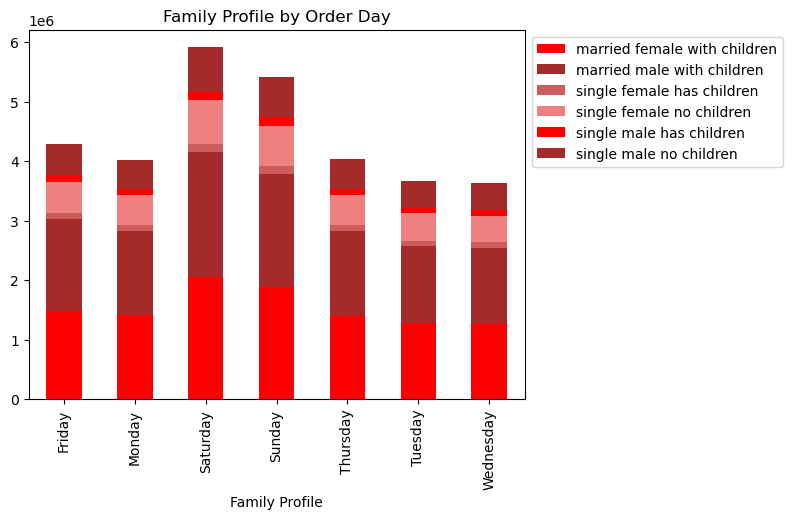

In [42]:
# Creating barchart to understand family_profiles by order volume on different days of the week
family_by_order_day_bar = family_by_order_day.plot.bar(color = ['red', 'brown', 'indianred', 'lightcoral'], stacked = True)
plt.title("Family Profile by Order Day")
plt.xlabel("Family Profile")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [43]:
# Exporting Graph
family_by_order_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_by_order_day_barchart.png'))

They also want to know whether there are particular times of the day when people
spend the most money, as this might inform the type of products they advertise at
these times.

Text(0.5, 0, 'Hour')

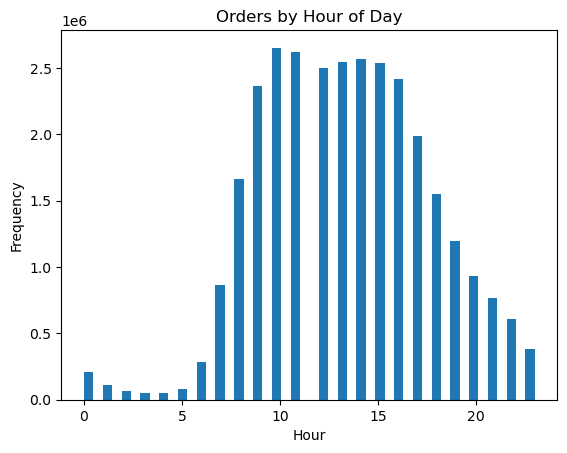

In [44]:
# Creating histograph of orders by hour of day to understand busiest hours of the day
hist_order_hour = final_df['order_hour'].plot.hist(bins = 48, title = 'Orders by Hour of Day')
plt.xlabel("Hour")

In [45]:
# Exporting Graph
hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_histogram.png'))

In [93]:
prices_by_hour = pd.crosstab(final_df['order_hour'],final_df['price_range_loc'], dropna = False)
prices_by_hour

price_range_loc,Low-range product,Mid-range product
order_hour,,
0,63382,140728
1,33276,74331
2,20122,44231
3,14697,33190
4,15364,34423
5,25532,57413
6,85073,190751
7,261354,585587
8,506680,1121341


In [92]:
prices_by_hour = pd.crosstab(final_df['order_hour'],final_df['spending_flag'], dropna = False)
prices_by_hour

spending_flag,High spender,Low spender
order_hour,,
0,3517,204674
1,2129,107570
2,1742,63996
3,1124,47707
4,1300,49499
5,1994,82511
6,6594,274681
7,17779,846253
8,30852,1629958


Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [47]:
# Reviewing prices data information to create pricing profiles
final_df['prices'].describe()

count    3.099154e+07
mean     1.193467e+01
std      4.911305e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [48]:
# Creating Pricing profile groups
final_df.loc[final_df['prices'] <= 5, 'price_range'] = 'low price'
final_df.loc[(final_df['prices'] > 5) & (final_df['prices'] < 15), 'price_range'] = 'mid price'
final_df.loc[final_df['prices'] >= 16, 'price_range'] = 'high price'

In [49]:
# Review data data columns
final_df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_y', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', ' price_range_loc',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependents', 'marital_status',
       'income', 'region', 'activity_flag', 'age_group', 'income_group',
       'department', 'dependents_group', 'family_profile',
       'new_orders_day_of_week', 'price_range'],
      dtype='object')

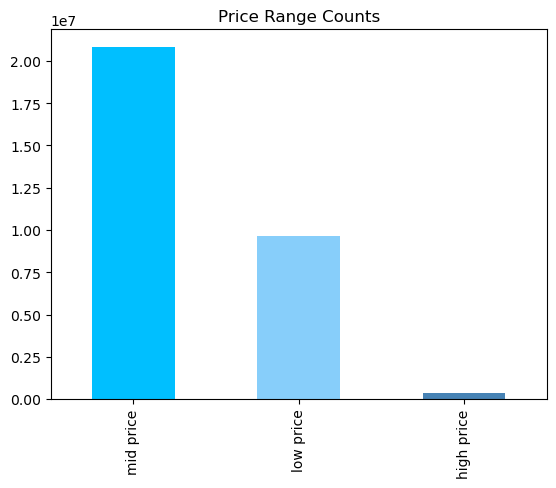

In [50]:
#Veiwing price range distribution based on price profiles
price_range_bar = final_df['price_range'].value_counts().plot.bar(title = 'Price Range Counts', color = ['deepskyblue', 'lightskyblue', 'steelblue'] )

In [51]:
# exporting graph
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_barchart.png'))

In [52]:
# Creating crosstab of price_range and income_group
price_range_by_income = pd.crosstab(final_df['price_range'],final_df['income_group'], dropna = False)
price_range_by_income

income_group,High Income,Low Income,Middle Income
price_range,,,
high price,105594,67087,201866
low price,2304484,2771377,4598998
mid price,5307054,4886397,10632283


Text(0.5, 0, 'Income Group')

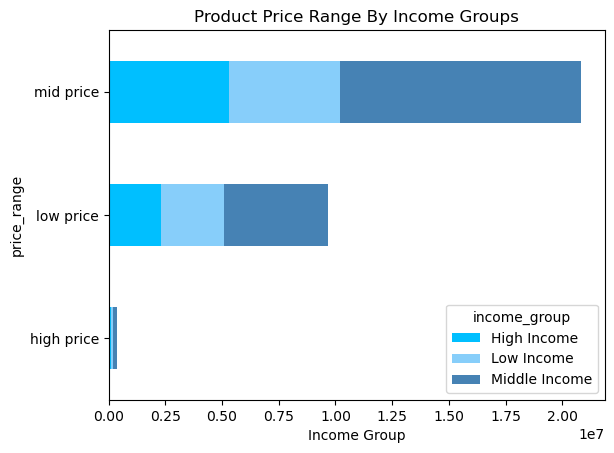

In [53]:
# Visualizing crosstab
price_range_by_income_bar = price_range_by_income.sort_values(by=['High Income'], ascending = True).plot.barh(color = ['deepskyblue', 'lightskyblue', 'steelblue'], stacked= True)
plt.title("Product Price Range By Income Groups")
plt.xlabel("Income Group")

In [54]:
# Exporting Graphs
price_range_by_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_by_income_barchart.png'))

In [55]:
# Creating crosstab of price_range and family_profile
price_range_by_family_profile = pd.crosstab(final_df['price_range'],final_df['family_profile'], dropna = False)
price_range_by_family_profile

family_profile,married female with children,married male with children,single female has children,single female no children,single male has children,single male no children
price_range,,,,,,
high price,131095,134027,8555,45144,9264,46462
low price,3375058,3418750,226195,1205693,235612,1213551
mid price,7258100,7363134,486744,2597044,510584,2610128


Text(0.5, 0, 'Family Profile')

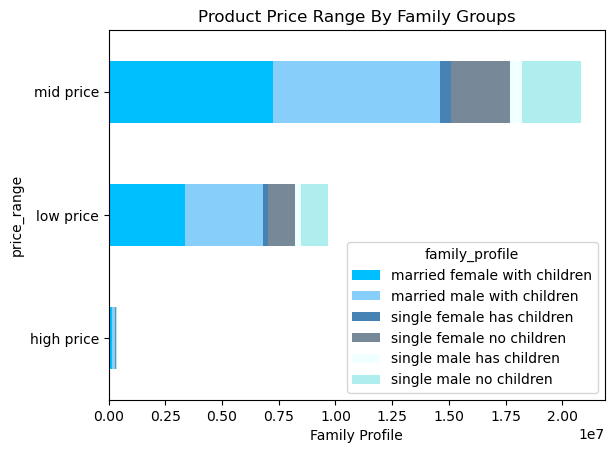

In [56]:
# Visualizing Profile
price_range_by_family_profile = price_range_by_family_profile.sort_values(by=['married female with children'], ascending = True).plot.barh(color = ['deepskyblue', 'lightskyblue', 'steelblue','lightslategray','azure','paleturquoise'], stacked= True)
plt.title("Product Price Range By Family Groups")
plt.xlabel("Family Profile")

In [57]:
# Exporting Graph
price_range_by_family_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_by_family_profile_barchart.png'))

Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.


Text(0.5, 0, 'Orders in Millions')

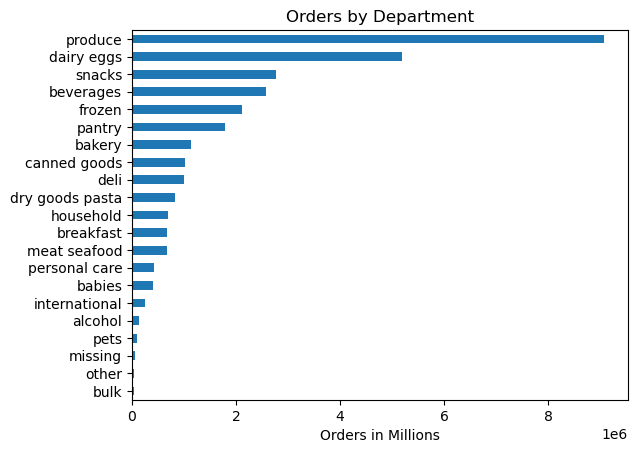

In [58]:
# Visualizing which departments have the highest orders to determine most valued products
department_orders = final_df['department'].value_counts().sort_values(ascending=True).plot.barh()
plt.title("Orders by Department")
plt.xlabel("Orders in Millions")

In [59]:
# Exporting Graphs
department_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_orders_barchart.png'))

The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example:
○ What’s the distribution among users in regards to their brand loyalty (i.e., how
often do they return to Instacart)?
○ Are there differences in ordering habits based on a customer’s loyalty status?
○ Are there differences in ordering habits based on a customer’s region?
○ Is there a connection between age and family status in terms of ordering
habits?
○ What different classifications does the demographic information suggest?
Age? Income? Certain types of goods? Family status?
○ What differences can you find in ordering habits of different customer
profiles? Consider the price of orders, the frequency of orders, the products
customers are ordering, and anything else you can think of.

○ What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

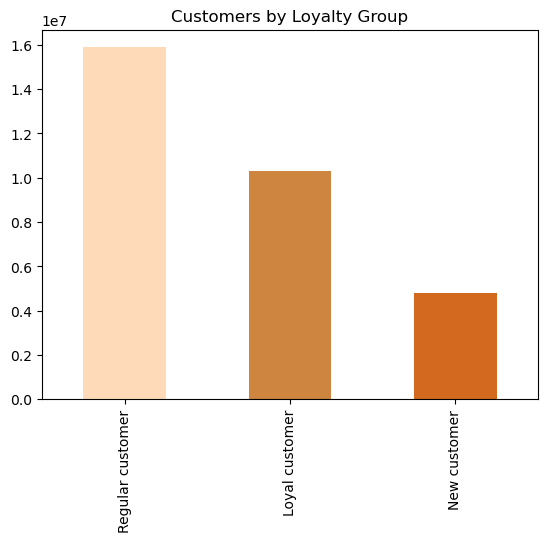

In [60]:
# Visualizing loyalty flag order values
loyalty_bar = final_df['loyalty_flag'].value_counts().plot.bar(color = ['peachpuff','peru','chocolate'],title = 'Customers by Loyalty Group' )

In [61]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_barchart.png'))

○ Are there differences in ordering habits based on a customer’s loyalty status?

In [62]:
# Creating crosstab on department and loyalty flag
loyalty_by_department = pd.crosstab(final_df['department'],final_df['loyalty_flag'], dropna = False)
loyalty_by_department

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,381686,172636,570704
beverages,855024,396658,1320252
breakfast,223577,107180,346316
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1835676,752101,2604051
deli,324046,158335,521453


Text(0.5, 0, 'Loyalty Profiles')

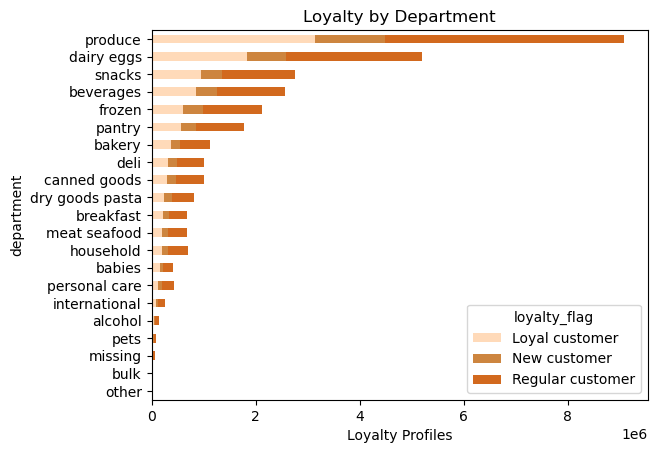

In [63]:
# Visualizing Crosstab
loyalty_by_department_bar = loyalty_by_department.sort_values(by=['Loyal customer'], ascending = True).plot.barh(color = ['peachpuff','peru','chocolate'], stacked= True)
plt.title("Loyalty by Department")
plt.xlabel("Loyalty Profiles")

In [64]:
# Exporting Graph
loyalty_by_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_by_deparment_barchart.png'))

In [65]:
# Creating Crosstab on region and loyalty flags
region_by_loyalty_group = pd.crosstab(final_df['region'],final_df['loyalty_flag'], dropna = False)
region_by_loyalty_group

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2375889,1137691,3753877
Northeast,1843702,842902,2783270
South,3408713,1594987,5316370
West,2665130,1232070,4036941


Text(0.5, 0, 'Regions')

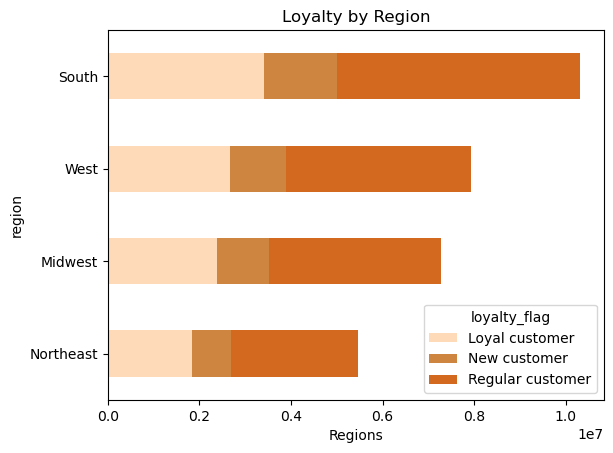

In [66]:
# Visualizing Crosstab
region_by_loyalty_group_bar = region_by_loyalty_group.sort_values(by=['Loyal customer'], ascending = True).plot.barh(color = ['peachpuff','peru','chocolate','sienna'], stacked = True)
plt.title("Loyalty by Region")
plt.xlabel("Regions")

In [ ]:
# Exporting Graph
region_by_loyalty_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_by_loyalty_group_barchart.png'))

In [ ]:
order_hour_by_loyalty_group = pd.crosstab(final_df['region'],final_df['loyalty_flag'], dropna = False)
order_hour_by_loyalty_group

○ Are there differences in ordering habits based on a customer’s region?

In [68]:
# Creating Crosstab on region and loyalty flags
department_by_region = pd.crosstab(final_df['department'],final_df['region'], dropna = False)
department_by_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,262614,200136,373055,289221
beverages,598990,462931,859435,650578
breakfast,157553,119157,225177,175186
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1215821,917293,1727823,1330891
deli,234464,178398,333620,257352


Text(0.5, 0, 'Regions')

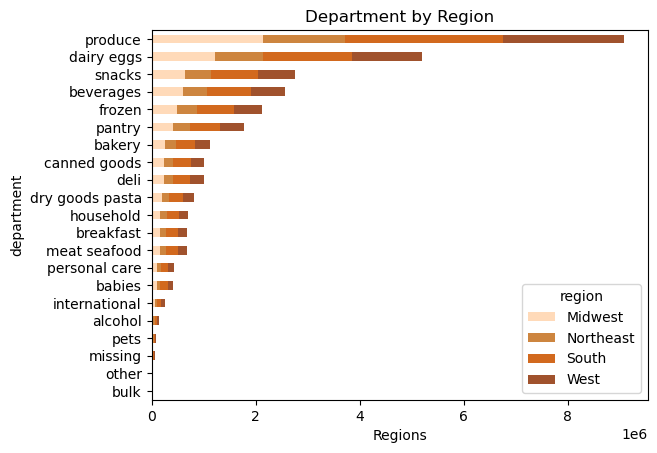

In [69]:
# Visualizing Crosstab
department_by_region_bar = department_by_region.sort_values(by=['South'], ascending = True).plot.barh(color = ['peachpuff','peru','chocolate','sienna'], stacked = True)
plt.title("Department by Region")
plt.xlabel("Regions")

In [70]:
# Exporting Graph
department_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_by_deparment_barchart.png'))

○ Is there a connection between age and family status in terms of ordering
habits?

In [71]:
# Creating Crosstab on region and loyalty flags
age_by_family = pd.crosstab(final_df['age_group'],final_df['family_profile'], dropna = False)
age_by_family

family_profile,married female with children,married male with children,single female has children,single female no children,single male has children,single male no children
age_group,,,,,,
Middle-Aged Adult,3575642,3609623,0,1209424,0,1217616
Old Adult,2183717,2191769,0,735279,0,706811
Regular Adult,3643687,3666610,0,1209814,0,1218777
Young Adult,1402142,1489080,724251,707426,758324,741550


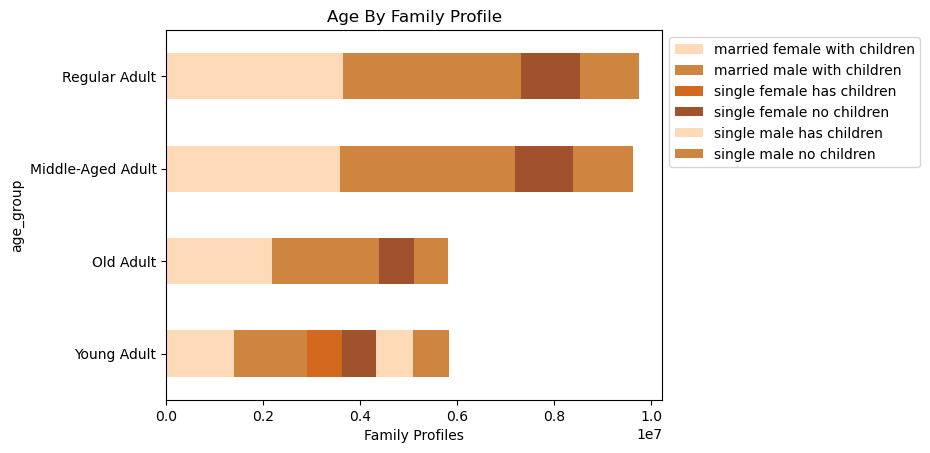

In [72]:
# Visualizing Crosstab
age_by_family_bar = age_by_family.sort_values(by=['married female with children'], ascending = True).plot.barh(color = ['peachpuff','peru','chocolate','sienna'], stacked = True)
plt.title("Age By Family Profile")
plt.xlabel("Family Profiles")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [73]:
# Exporting Graph
age_by_family_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_by_family_barchart.png'))

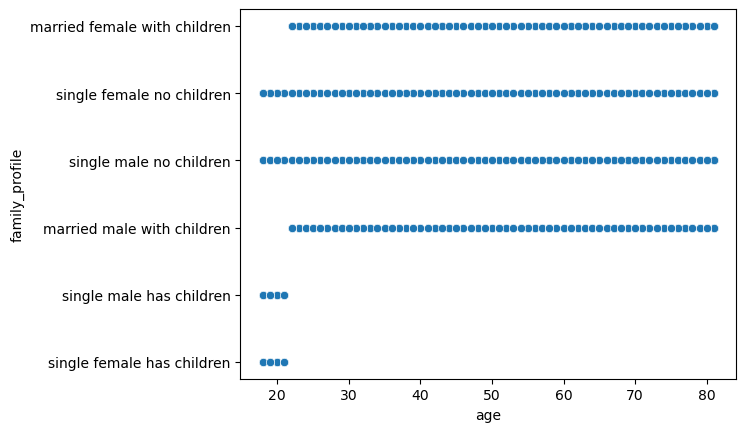

In [94]:
scatter_plot_age_family = sns.scatterplot(x = 'age', y = 'family_profile', data = final_df)

○ What different classifications does the demographic information suggest?
Age? Income? Certain types of goods? Family status?

##### See Previous Charts for Age, Income, Family Status, and Department Goods


○ What differences can you find in ordering habits of different customer
profiles? Consider the price of orders, the frequency of orders, the products
customers are ordering, and anything else you can think of.

In [74]:
# Reviewing Column Headers
final_df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_y', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', ' price_range_loc',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependents', 'marital_status',
       'income', 'region', 'activity_flag', 'age_group', 'income_group',
       'department', 'dependents_group', 'family_profile',
       'new_orders_day_of_week', 'price_range'],
      dtype='object')

In [75]:
# Creating Crosstab on frequency_flag and family_profile
frequency_by_family_status = pd.crosstab(final_df['frequency_flag'],final_df['family_profile'], dropna = False)
frequency_by_family_status

family_profile,married female with children,married male with children,single female has children,single female no children,single male has children,single male no children
frequency_flag,,,,,,
Frequent customer,7408436,7492004,498957,2640601,532539,2648809
Non-frequent customer,1011695,1029071,66705,353102,72131,364519
Regular customer,2385057,2436007,158589,868240,153654,871426


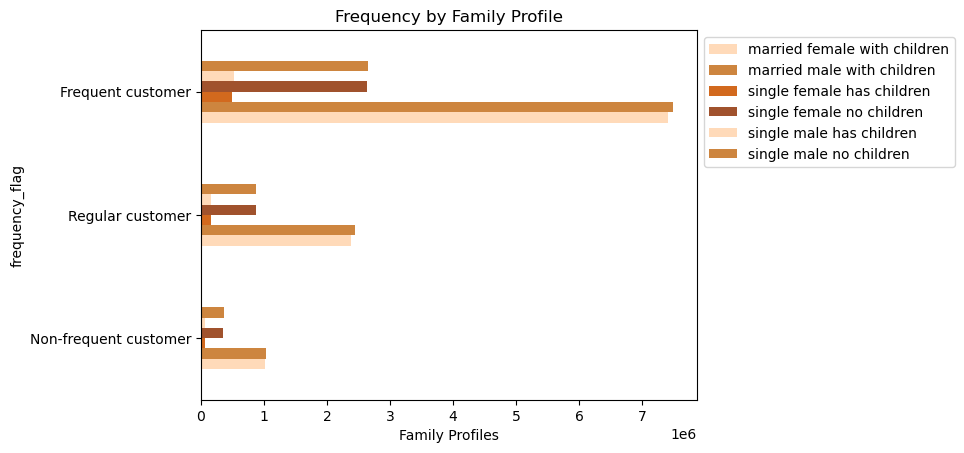

In [76]:
# Visualizing Crosstab
frequency_by_family_status_bar = frequency_by_family_status.sort_values(by=['married female with children'], ascending = True).plot.barh(color = ['peachpuff','peru','chocolate','sienna'])
plt.title("Frequency by Family Profile")
plt.xlabel("Family Profiles")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [77]:
frequency_by_family_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_by_family_status_barchart.png'))

In [78]:
# Creating Crosstab on frequency_flag and income_group
frequency_by_income_group = pd.crosstab(final_df['frequency_flag'],final_df['income_group'], dropna = False)
frequency_by_income_group

income_group,High Income,Low Income,Middle Income
frequency_flag,,,
Frequent customer,5336017,5227008,10658321
Non-frequent customer,700919,791213,1405091
Regular customer,1711066,1729750,3432157


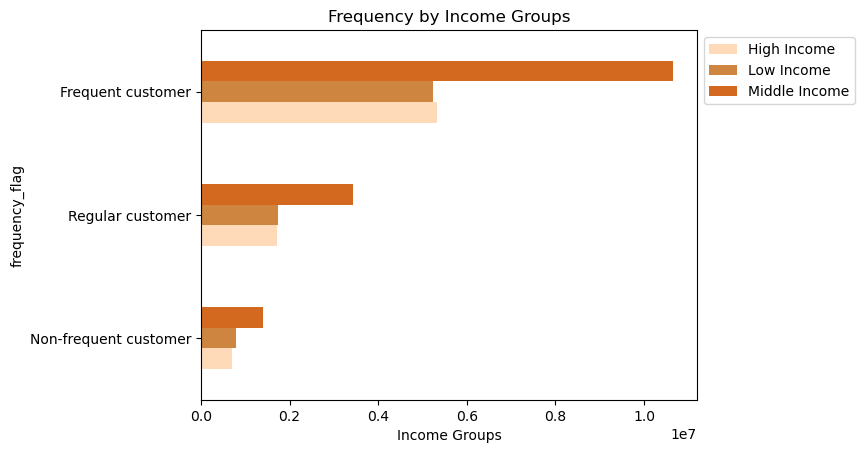

In [79]:
# Visualizing Crosstab
frequency_by_income_group_bar = frequency_by_income_group.sort_values(by=['High Income'], ascending = True).plot.barh(color = ['peachpuff','peru','chocolate','sienna'])
plt.title("Frequency by Income Groups")
plt.xlabel("Income Groups")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [80]:
# Exporting Graph
frequency_by_income_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_by_income_group_barchart.png'))

In [81]:
# Creating Crosstab on frequency_flag and age_groups
frequency_by_age_group = pd.crosstab(final_df['frequency_flag'],final_df['age_group'], dropna = False)
frequency_by_age_group

age_group,Middle-Aged Adult,Old Adult,Regular Adult,Young Adult
frequency_flag,,,,
Frequent customer,6572505,3990415,6660886,3997540
Non-frequent customer,906988,538473,911493,540269
Regular customer,2132812,1288688,2166509,1284964


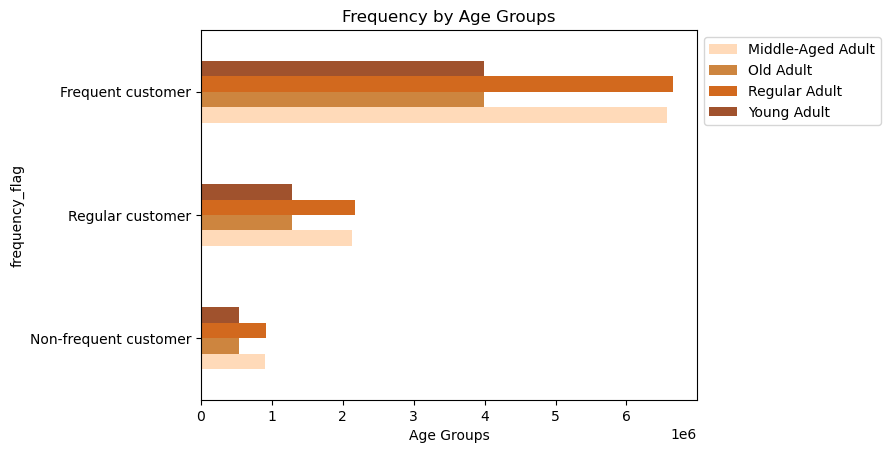

In [82]:
# Visualizing Crosstab
frequency_by_age_group_bar = frequency_by_age_group.sort_values(by=['Middle-Aged Adult'], ascending = True).plot.barh(color = ['peachpuff','peru','chocolate','sienna'])
plt.title("Frequency by Age Groups")
plt.xlabel("Age Groups")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [83]:
# Exporting Graph
frequency_by_age_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_by_age_group_barchart.png'))

In [84]:
# Creating Crosstab on frequency_flag and department
frequency_by_department = pd.crosstab(final_df['frequency_flag'],final_df['department'], dropna = False)
frequency_by_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
frequency_flag,,,,,,,,,,,,,,,,,,,,,
Frequent customer,100493,316136,773396,1756077,459905,25087,658670,3633678,674508,534015,...,437593,170735,449334,48288,23545,1193987,274398,58502,6360680,1903171
Non-frequent customer,13270,25287,103441,244038,64770,2509,108010,454047,98127,87936,...,84875,26164,66918,4181,3324,181849,46908,9758,788157,255154
Regular customer,30864,68969,248189,571819,152398,5855,245394,1104103,231199,200185,...,177390,59092,158533,12299,7542,407067,103056,24805,1930439,608081


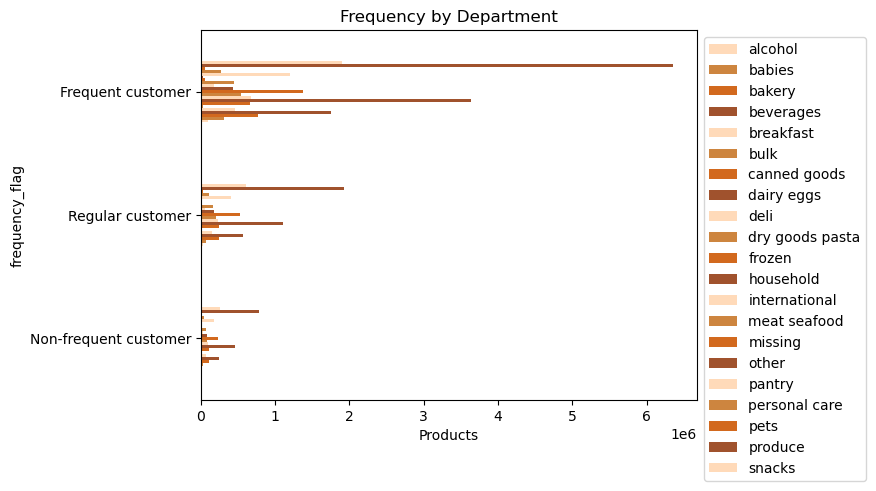

In [85]:
# Visualizing Crosstab
frequency_by_department_bar = frequency_by_department.sort_values(by=['produce'], ascending = True).plot.barh(color = ['peachpuff','peru','chocolate','sienna'])
plt.title("Frequency by Department")
plt.xlabel("Products")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [86]:
# Exporting Graph
frequency_by_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_by_department_barchart.png'))

In [87]:
# Creating Crosstab on frequency_flag and new_orders_day_of_week
frequency_by_day_of_week = pd.crosstab(final_df['frequency_flag'],final_df['new_orders_day_of_week'], dropna = False)
frequency_by_day_of_week

new_orders_day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
frequency_flag,,,,,,,
Frequent customer,2906181,2735700,3914150,3736999,2866078,2517062,2545176
Non-frequent customer,407010,382457,614850,497724,341520,340764,312898
Regular customer,981570,910153,1384608,1182103,829556,814944,770039


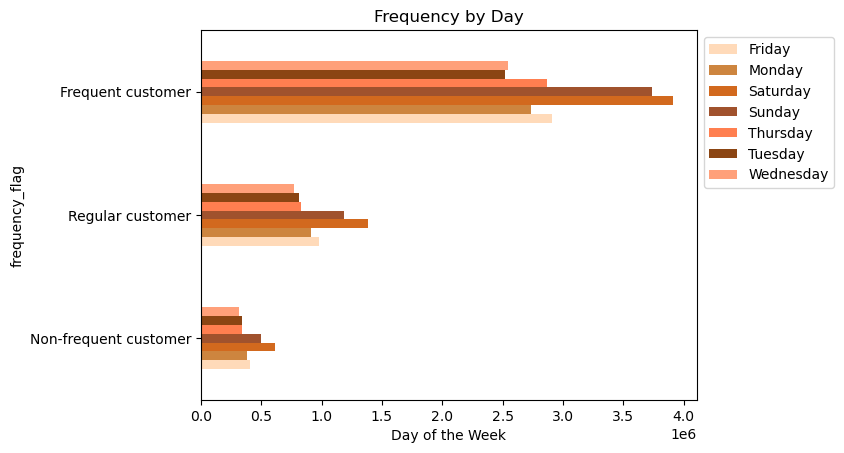

In [88]:
# Visualizing Crosstab
frequency_by_day_of_week_bar = frequency_by_day_of_week.sort_values(by=['Saturday'], ascending = True).plot.barh(color = ['peachpuff','peru','chocolate','sienna', 'coral','saddlebrown', 'lightsalmon'])
plt.title("Frequency by Day")
plt.xlabel("Day of the Week")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [89]:
# Exporting Graph
frequency_by_day_of_week_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_by_day_of_week_barchart.png'))

In [90]:
# Exporting Final Data Set
final_df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data_instacart_visualized.pkl'))